# Heatmaps in R

Heatmaps are useful tools in visualizing and comparing multiple continuous variables across a large number of samples. Both base R and *ggplot2* provide capabilities for generating heatmaps, with the process being perhaps more simplified in base R.

In [1]:
IRdisplay::display_pdf(file = "../plots/prettyHeat.pdf")

We'll be working with the *mtcars* dataset available in base R, which contains design and performance traits for a variety of car models. Let's start by seeing if we can generate a nice heatmap in base R!

## Heatmaps in base R

Let's start by taking a quick look at what our data looks like! We'll convert our data to matrix format so all the variables are interpreted as continuous variables. Before we do this, it's important to make sure that our dataframe columns can be validly interpreted as continuous variables!

In [2]:
#get summary of mtcars dataset
head(mtcars)

                  mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1   

In [3]:
#convert to matrix
datMC <- as.matrix(mtcars)
summary(datMC)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

To produce our first heatmap, it's as simple as providing this matrix to the *heatmap()* function in base R.

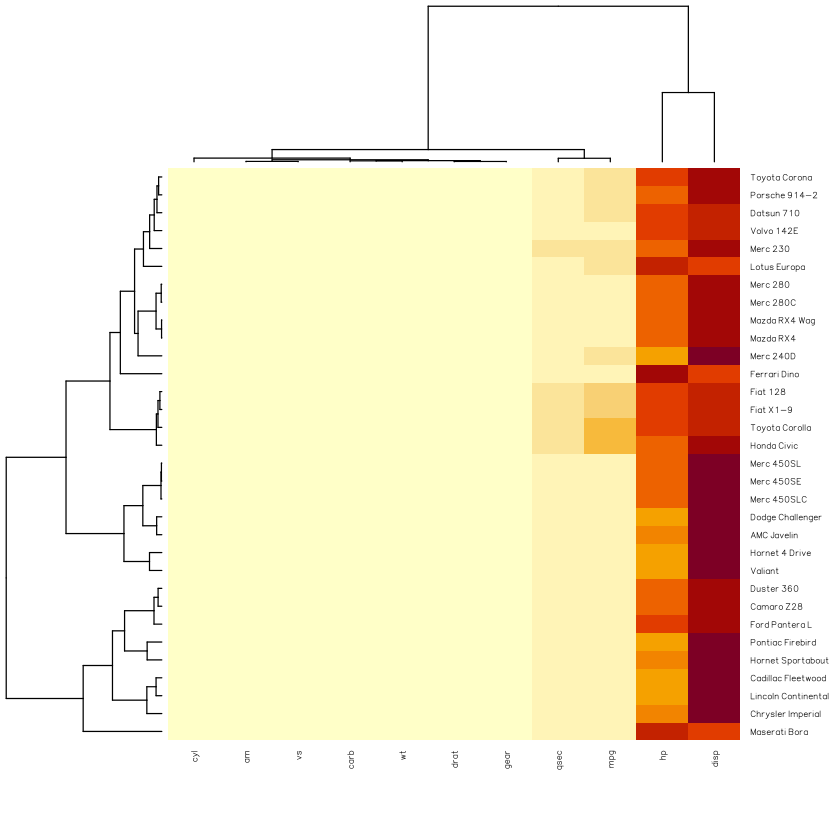

In [4]:
#basic heatmap
heatmap(datMC)

We'll notice that this didn't really come out the way that we were expecting. The vast majority of the cells are the same color, with most of the variation being restricted to 2 variables. 

The main issue here is that by default, the *heatmap()* function attempts to color cells across the entire heatmap according to the same gradient. When the range over which data occurs differs greatly across the variables, variation across variables is typically going to be much greater than variation within the observations for a single variable. This results in uninformative heatmaps like the one that we just produced. 

Recognizing this, *heatmap()* allows for built-in normalization of each of the variables, minimizing the impact of differences in raw data distribution. We can specify normalization according to each variable ("column of the heatmap") by setting the *scale* keyword argument to *"column"*.

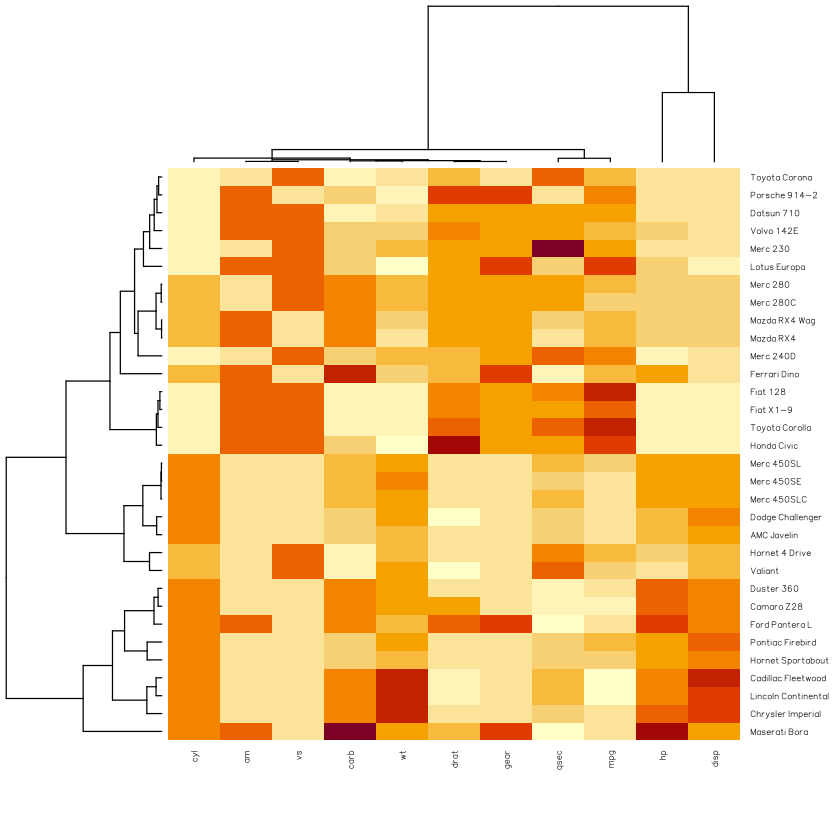

In [5]:
#heatmap with scaled variables/columns
heatmap(datMC, 
        scale="column") #scale by variable/trait/column

Much better! Let's also provide a color-blind friendly palette using the *col* keyword argument.

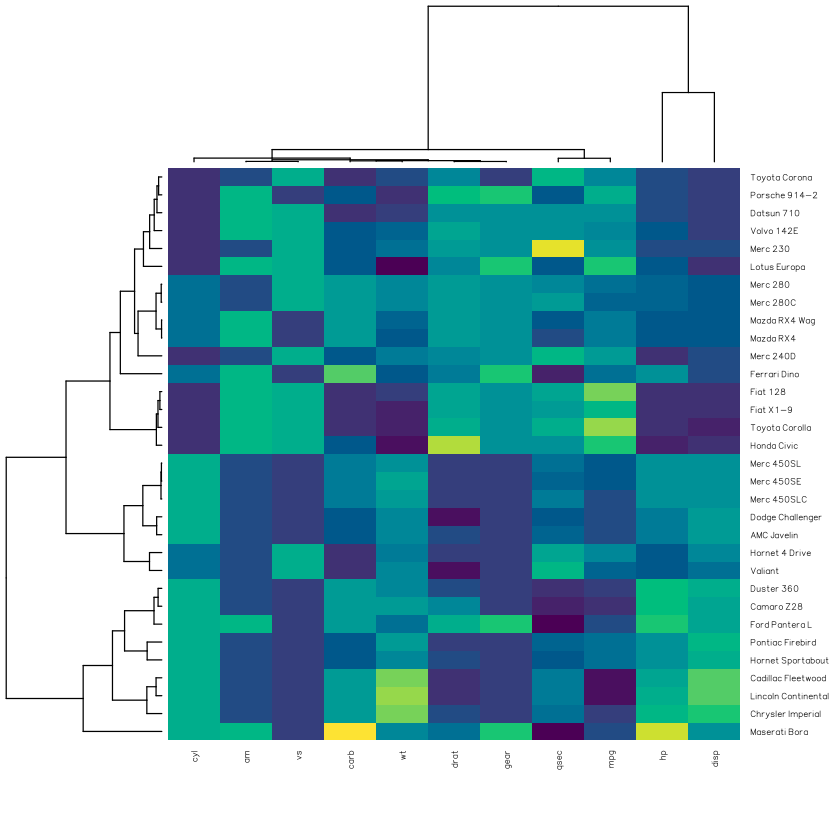

In [6]:
#heatmap with scaled variables/columns
heatmap(datMC, #matrix
        scale="column",#scale by variable/trait/column
       col=hcl.colors(25,"viridis")) #provide 25 colors from the viridis palette

In [7]:
If we find the dendograms to be a little cluttering, we can get rid of those pretty easily as well.

PARSE ERROR: <text>:1:4: unexpected symbol
1: If we
       ^

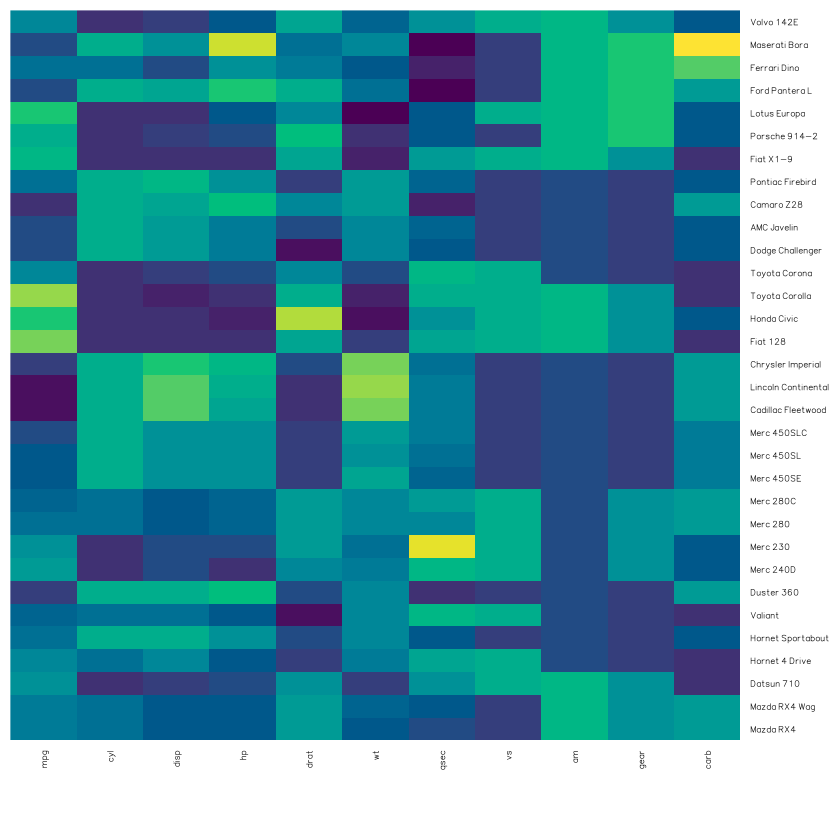

In [8]:
#heatmap with scaled variables/columns
heatmap(datMC, #matrix
        scale="column",#scale by variable/trait/column
        col=hcl.colors(25,"viridis"), #provide 25 colors from the viridis palette
        Colv = NA, Rowv = NA) #no clustering or dendograms by row or column

You'll notice that when we remove the dendograms, the order of traits (columns) and cars (rows) returns to the same order that is seen in the original matrix. This is because without any additional clustering steps, this default ordering is retained in the heatmap.

One cool thing we can do in base R is group our samples based on additional conditions, and then display those groupings as part of our heatmap. As a demonstration of this, let's try to group our car models by manufacturer!

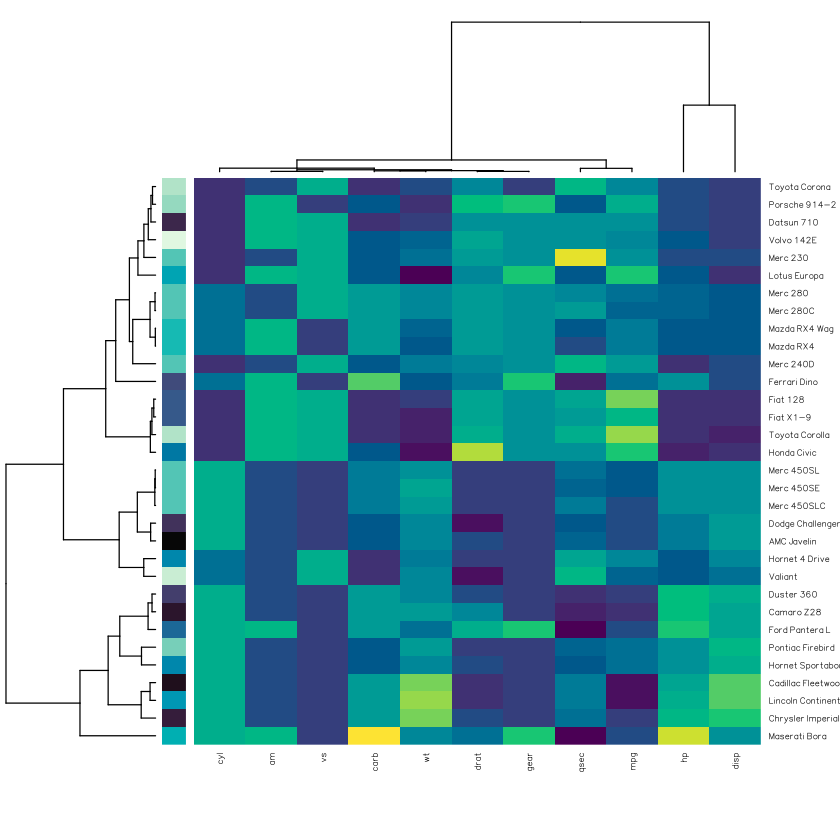

In [9]:
#initialize vector to store manufacturer
carManufac <- c()
#loop through rownames
for(rowname in rownames(datMC)){ 
    #split rownames based on spaces, extract first word and add to vector
    carManufac <- c(carManufac,strsplit(rowname," ")[[1]][1])
}
#turn vector of strings into vector of factors
carManufac <- as.factor(carManufac) 
#convert vector of factors into a numeric (unique number for each factor level), assign color based on number
colSide <- hcl.colors(length(levels(carManufac)), "Mako")[as.numeric(carManufac)] 

#heatmap
heatmap(datMC, #matrix
        scale="column",#scale by variable/trait/column
        col=hcl.colors(25,"viridis"), #provide 25 colors from the viridis palette
        RowSideColors=colSide) #add colors to designate row groups

To finish off, let's go ahead and add some more informative trait labels for our X-axis!

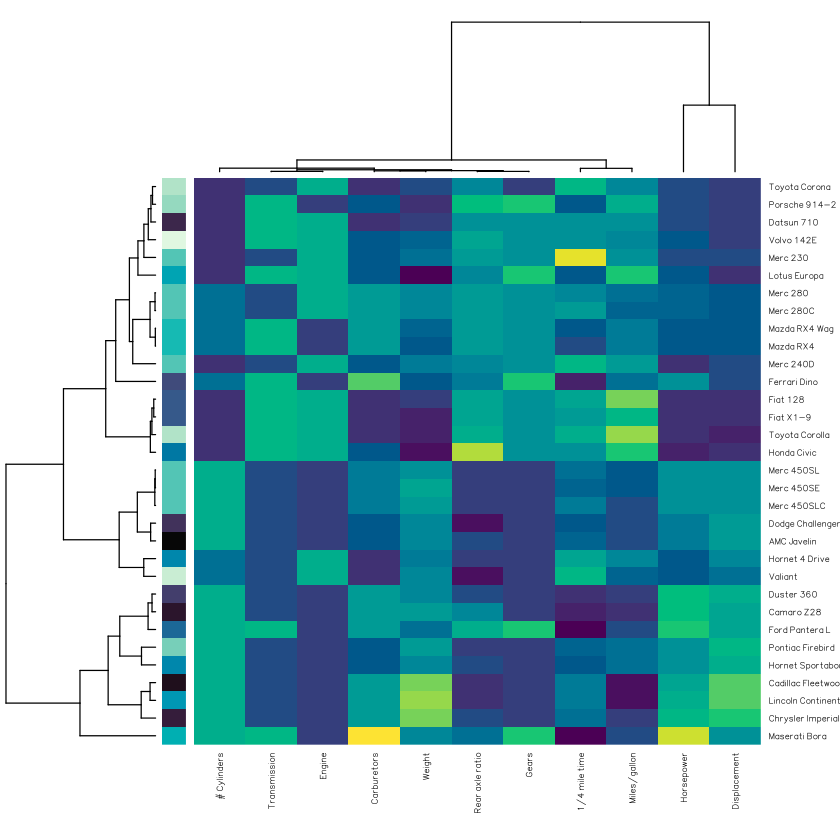

In [10]:
#vector of new column names
newColNames <- c("Miles/gallon","# Cylinders",
                 "Displacement","Horsepower",
                 "Rear axle ratio","Weight",
                 "1/4 mile time","Engine",
                 "Transmission","Gears","Carburetors")

#heatmap with new labels
heatmap(datMC, #matrix
        scale="column",#scale by variable/trait/column
        col=hcl.colors(25,"viridis"), #provide 25 colors from the viridis palette
        RowSideColors=colSide, #add colors to designate row groups
        labCol=newColNames) #add new column names

Finally, we can save this plot as a pdf for future reference.

In [11]:
#start pdf device
pdf("../plots/prettyHeat.pdf",width=8,height=7)
#heatmap 
heatmap(datMC, #matrix
        scale="column",#scale by variable/trait/column
        col=hcl.colors(25,"viridis"), #provide 25 colors from the viridis palette
        RowSideColors=colSide, #add colors to designate row groups
        labCol=newColNames, #add new column names
        cexRow=0.75,cexCol=0.75) #modify label sizes (change this based on how the pdf comes out)
#close pdf device
dev.off()

pdf 
  2 

## Heatmaps in ggplot2

Creating heatmaps in *ggplot2* requires slightly more steps in terms of preparing our data, and also doesn't come with some of the functionality that *heatmap* does. Regardless, let's see how we would use *ggplot2* to create a heatmap if we wanted to!

The first major difference when using *ggplot2* is that our data must now be transposed into long format, where each observation occupies it's own row. Each row would then have three rows: the variable/trait in question (X-coordinate), the sample (Y-coordinate), and the associated value. Let's walk through how to do this transformation.

Additionally, beacuse *ggplot2* doesn't provide any built-in methods for normalization, we'll perform our ou=wn normalization by converting each observation to a z-score based on the column that it's in.

In [12]:
#load ggplot2
library(ggplot2)

#current format of our data: each row is a sample and columns are variables/traits
head(datMC)

                  mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1   

In [13]:
#normalization
datMCNorm <- apply(datMC,2,function(x) (x-mean(x))/sd(x))

#create a new dataframe for long form data
datMCLong <- as.data.frame(matrix(ncol=3,nrow=0))

#loop through rows of current datMC
for(i in 1:nrow(datMCNorm)){

    #bind to new long format data
    datMCLong <- rbind(datMCLong, #row bind to long format data
                      cbind(rownames(datMCNorm)[i], #car model
                           datMCNorm[i,], #observations for car model
                           colnames(datMCNorm))) #trait names
}
#row names and column names
rownames(datMCLong) <- NULL
colnames(datMCLong) <- c("carModel","val","trait")
head(datMCLong)

  carModel  val                trait
1 Mazda RX4 0.150884824647657  mpg  
2 Mazda RX4 -0.104987808575239 cyl  
3 Mazda RX4 -0.570619818667904 disp 
4 Mazda RX4 -0.535092839730217 hp   
5 Mazda RX4 0.567513685376339  drat 
6 Mazda RX4 -0.610399567481535 wt   

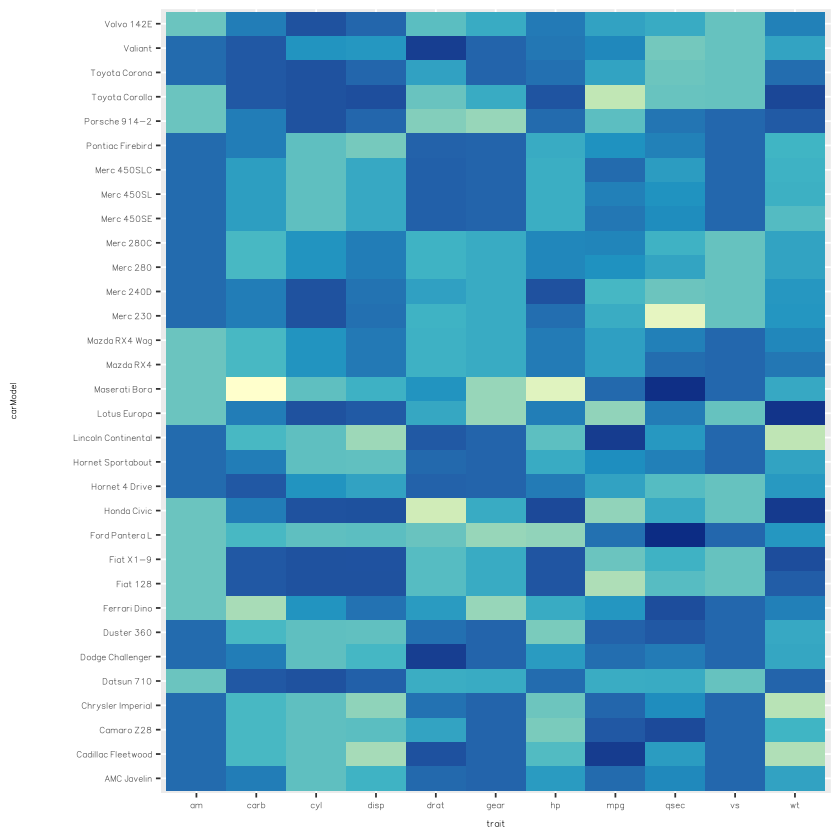

In [14]:
#create heatmap 
ggplot(datMCLong, aes(x=trait, y=carModel,fill=as.numeric(val))) + 
  geom_tile(show.legend = F)+
  scale_fill_distiller(palette = "YlGnBu")

This looks pretty decent! Unfortunately though, the traits and car models seemed to have been ordered alphabetically rather than following the original order they are present in the original matrix. Let's see if we can change that!

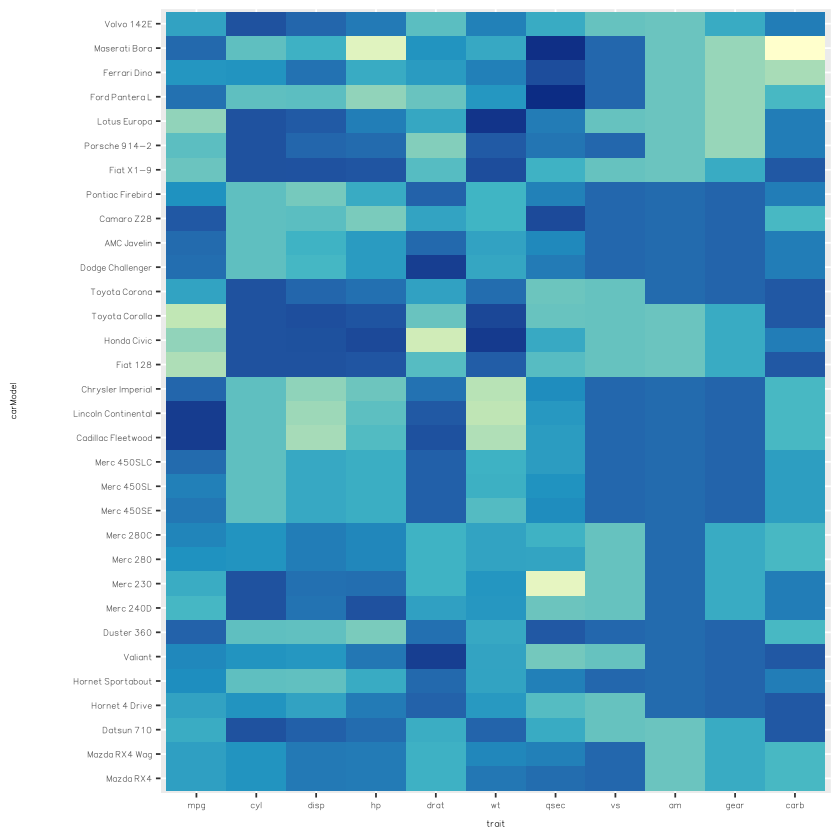

In [18]:
#turn trait column into factor so we can order the levels
datMCLong$trait <- factor(datMCLong$trait,
                          levels=unique(datMCLong$trait))
#turn carModel column into factor so we can order the levels
datMCLong$carModel <- factor(datMCLong$carModel,
                         levels=unique(datMCLong$carModel))

#heatmap with new order
ggplot(datMCLong, aes(x=trait, y=carModel,fill=as.numeric(val))) + 
  geom_tile(show.legend = F)+
  scale_fill_distiller(palette = "YlGnBu")

Much better, let's make some final aesthethic changes and we should be done!

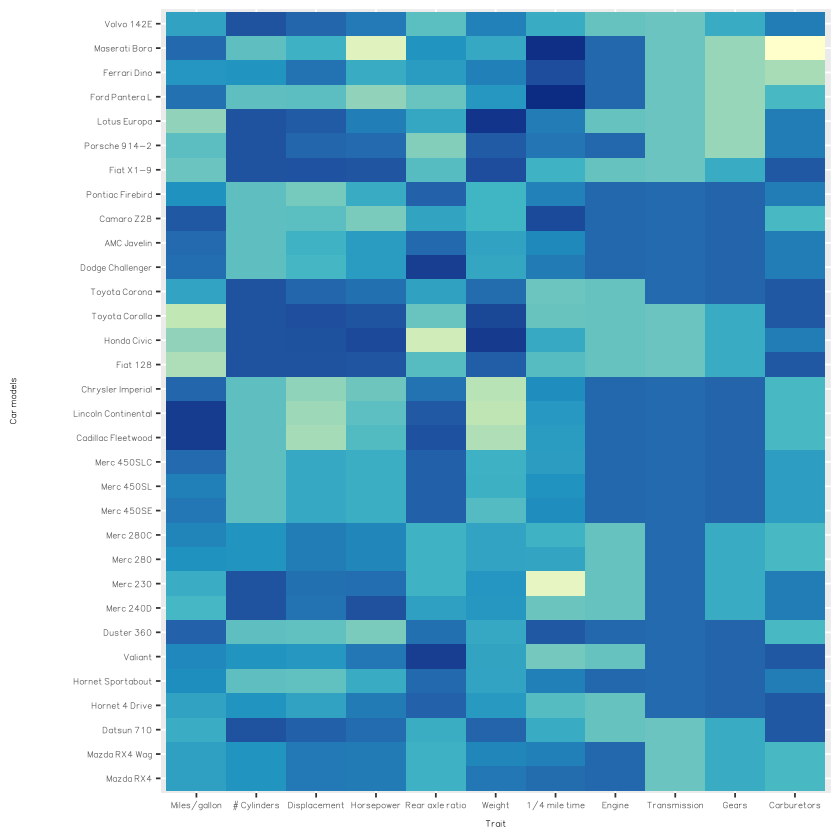

In [21]:
#heatmap with new order
ggplotHeat<- ggplot(datMCLong, aes(x=trait, y=carModel,fill=as.numeric(val))) + 
  geom_tile(show.legend = F)+
  scale_fill_distiller(palette = "YlGnBu")+
  scale_x_discrete("Trait",label=newColNames)+
  scale_y_discrete("Car models")
ggplotHeat

Done! Let's go ahead and save this plot as a pdf.

In [24]:
#save heatmap
ggsave(ggplotHeat, #object to save
       filename = paste0("../plots/ggplotHeat.pdf"), #file path
       width = 11, #pdf dimensions
       height = 7,
       units = "in") #units for dimensions